In [17]:
import matplotlib.pyplot as plt
import os
import pandas as pd
from datetime import datetime


   Unnamed: 0  users     values                time
0           0      4   2.000000 1900-01-01 13:56:17
1           1     10  11.428571 1900-01-01 13:56:22
2           2     10  12.300000 1900-01-01 13:56:27
3           3     10  14.400000 1900-01-01 13:56:32
4           4     10  14.100000 1900-01-01 13:56:37
                      Time        CPU    Memory
0  2021-06-16T11:51:48.083  313040698  32792576
1  2021-06-16T11:51:49.090  318631117  32940032
2  2021-06-16T11:51:50.095  323882520  32882688
3  2021-06-16T11:51:51.108  328946455  32854016
4  2021-06-16T11:51:52.119  334634792  33026048


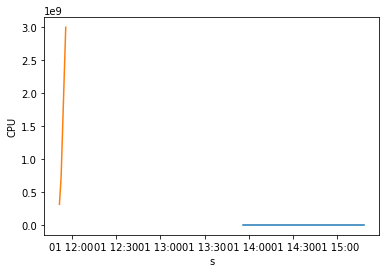

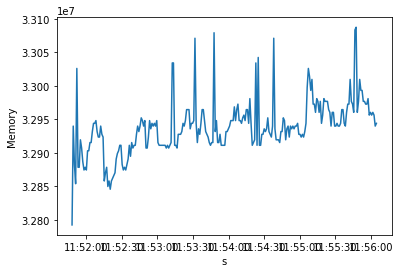

In [57]:
def get_time_in_s(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    a_timedelta = x - datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

def get_time_date(x):
    x = x.split("T")[-1]
    x = datetime.strptime(x, '%H:%M:%S.%f')
    return x

def locust_get_time(x):
    return datetime.strptime(x, "%H:%M:%S")

df_locust = pd.read_csv("locust_data.csv")
df_locust['time'] = df_locust['time'].apply(lambda x: locust_get_time(x))
print(df_locust.head())

for f_name in os.listdir("data"):
    f_name = "data/" + f_name
    df = pd.read_csv(f_name, delimiter=",")
    print(df.head())
    df["Time_in_s"] = df["Time"].apply(lambda x: get_time_in_s(x))
    df["Time_in_s"] = df["Time_in_s"] - df["Time_in_s"][0]
    
    df["Time_datetime"] = df["Time"].apply(lambda x: get_time_date(x))
    
    plt.plot(df_locust["time"], df_locust["values"])
    plt.plot(df["Time_datetime"], df["CPU"])
    plt.xlabel("s")
    plt.ylabel("CPU")
    plt.show()
    
    plt.plot(df["Time_datetime"], df["Memory"])
    plt.xlabel("s")
    plt.ylabel("Memory")
    plt.show()